In [1]:
from pycaret.clustering import *
import pandas as pd 

In [2]:
sugarcane = pd.read_csv('described_sugarcane.csv')

In [3]:
# Average by feature
# Densidad aparente 0 - 30 cm
sugarcane['densidad_aparente_0-30cm_mean'] = (sugarcane['bdod_0-5cm_mean'] + sugarcane['bdod_5-15cm_mean'] + sugarcane['bdod_15-30cm_mean'])/3
# Capacidad de intercambio catiónico
sugarcane['intercambio_catiónico_0-30cm_mean'] = (sugarcane['cec_0-5cm_mean'] + sugarcane['cec_5-15cm_mean'] + sugarcane['cec_15-30cm_mean'])/3
# Fracción gruesa
sugarcane['fraccion_gruesa_0-30cm_mean'] = (sugarcane['cfvo_0-5cm_mean'] + sugarcane['cfvo_5-15cm_mean'] + sugarcane['cfvo_15-30cm_mean'])/3
# Arcillas
sugarcane['arcillas_0-30cm_mean'] = (sugarcane['clay_0-5cm_mean'] + sugarcane['clay_5-15cm_mean'] + sugarcane['clay_15-30cm_mean'])/3
# Nitrógeno
sugarcane['nitrogeno_0-30cm_mean'] = (sugarcane['nitrogen_0-5cm_mean'] + sugarcane['nitrogen_5-15cm_mean'] + sugarcane['nitrogen_15-30cm_mean'])/3
# pH
sugarcane['ph_0-30cm_mean'] = (sugarcane['phh2o_0-5cm_mean'] + sugarcane['phh2o_5-15cm_mean'] + sugarcane['phh2o_15-30cm_mean'])/3
# Arena
sugarcane['arena_0-30cm_mean'] = (sugarcane['sand_0-5cm_mean'] + sugarcane['sand_5-15cm_mean'] + sugarcane['sand_15-30cm_mean'])/3
# Limo
sugarcane['limo_0-30cm_mean'] = (sugarcane['silt_0-5cm_mean'] + sugarcane['silt_5-15cm_mean'] + sugarcane['silt_15-30cm_mean'])/3
# Carbono orgánico
sugarcane['carbono_organico_0-30cm_mean'] = (sugarcane['soc_0-5cm_mean'] + sugarcane['soc_5-15cm_mean'] + sugarcane['soc_15-30cm_mean'])/3
# Renombrando columnas
sugarcane = sugarcane.rename({'MOD13Q1_006__250m_16_days_NDVI':'NDVI','CLRSKY_SFC_PAR_TOT':'PAR'}, axis=1)
sugarcane_average = sugarcane[['year', 'month','longitude',
       'latitude','ingenio', 'hacienda', 'area', 'variedad', 'edad', 'corte',
       'lote_comercial', 'lote_semillero', 'RSD', 'LSD',  'incidencia_RSD', 'incidencia_LSD', 'prevalencia_RSD',
       'prevalencia_LSD',
       'NDVI', 'RH2M', 'PRECTOTCORR',
       'WS2M', 'PAR', 'T2M', 'T2M_MAX', 'T2M_MIN', 
       'densidad_aparente_0-30cm_mean',
       'intercambio_catiónico_0-30cm_mean', 'fraccion_gruesa_0-30cm_mean',
       'arcillas_0-30cm_mean', 'nitrogeno_0-30cm_mean', 'ph_0-30cm_mean',
       'arena_0-30cm_mean', 'limo_0-30cm_mean',
       'carbono_organico_0-30cm_mean']]
sugarcane_average = sugarcane_average.round(2)

In [ ]:
sugarcane_average.to_csv('sugarcane_base.csv', index = False)

In [4]:
# exp_clu101 = setup(sugarcane_average, normalize = True, silent=True,session_id = 123)

In [5]:
# kmeans = create_model('kmeans')

In [6]:
# plot_model(kmeans, plot='elbow')

In [7]:
# kmeans = create_model('kmeans', num_clusters=5)

## DISEASES

In [8]:
disease = sugarcane[['longitude', 'latitude', 'RSD', 'LSD']]
disease

,longitude,latitude,RSD,LSD
0,-76.38,3.24,0.0,0.0
1,-76.37,3.56,0.0,0.0
2,-76.48,3.34,0.0,0.0
3,-76.31,3.40,0.0,0.0
4,-76.30,3.26,0.0,0.0
...,...,...,...,...
20800,-76.53,3.17,0.0,0.0
20801,-76.29,3.37,0.0,0.0
20802,-76.29,3.37,0.0,0.0
20803,-76.33,3.28,0.0,0.0


In [9]:
# exp_clu101 = setup(disease, normalize = True, ,silent=True,session_id = 123)

In [10]:
# kmeans = create_model('kmeans')

In [11]:
# plot_model(kmeans, plot='elbow')

In [12]:
# plot_model(kmeans, plot='silhouette')

In [13]:
# kmeans1 = create_model('kmeans', num_clusters=5)

In [14]:
# plot_model(kmeans1, plot='elbow')

In [15]:
# plot_model(kmeans1, plot='silhouette')

In [16]:
#kmeans2 = create_model('kmeans', num_clusters=6)

In [17]:
# plot_model(kmeans2, plot='elbow')

# MEJOR MODELO

In [18]:
diseases_clusters = setup(disease, normalize = False, silent=True,session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(20805, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(20805, 4)"
9,CPU Jobs,-1


In [19]:
kmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8901,39686.0877,0.3911,0,0,0


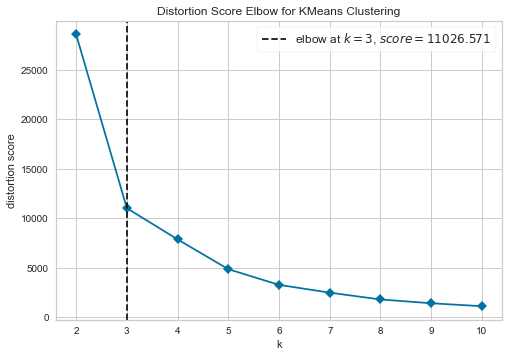

In [20]:
plot_model(kmeans, plot='elbow')

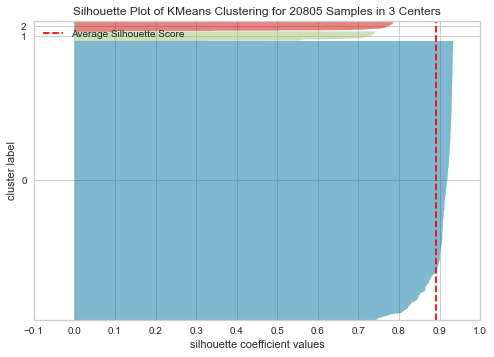

In [21]:
plot_model(kmeans, plot='silhouette')

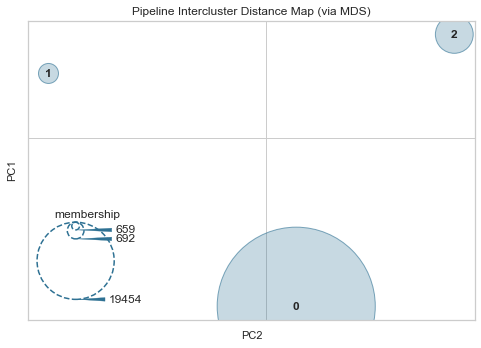

In [22]:
plot_model(kmeans, plot='distance')

In [23]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [24]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,longitude,latitude,RSD,LSD,Cluster
0,-76.38,3.24,0.0,0.0,Cluster 0
1,-76.37,3.56,0.0,0.0,Cluster 0
2,-76.48,3.34,0.0,0.0,Cluster 0
3,-76.31,3.40,0.0,0.0,Cluster 0
4,-76.30,3.26,0.0,0.0,Cluster 0


In [25]:
kmean_results

,longitude,latitude,RSD,LSD,Cluster
0,-76.38,3.24,0.0,0.0,Cluster 0
1,-76.37,3.56,0.0,0.0,Cluster 0
2,-76.48,3.34,0.0,0.0,Cluster 0
3,-76.31,3.40,0.0,0.0,Cluster 0
4,-76.30,3.26,0.0,0.0,Cluster 0
...,...,...,...,...,...
20800,-76.53,3.17,0.0,0.0,Cluster 0
20801,-76.29,3.37,0.0,0.0,Cluster 0
20802,-76.29,3.37,0.0,0.0,Cluster 0
20803,-76.33,3.28,0.0,0.0,Cluster 0


In [26]:
sugarcane_average['cluster'] = kmean_results['Cluster']

In [29]:
sugarcane_average.to_csv('sugarcane_clusters.csv', index=False)